# Телекоммуникации

### Описание проекта

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

### План работы:

#### Шаг 1. Загрузка данных

Загрузить данные из файлов:

- contract_new.csv

- personal_new.csv

- internet_new.csv

- phone_new.csv

Провести первичный осмотр данных:

- Проверить количество строк и столбцов.

- Определить типы данных.

- Проверить наличие пропущенных значений.


#### Шаг 2. Исследовательский анализ и предобработка данных

Предобработка данных:

- Привести названия столбцов к змеиному регистру.

- Провести обработку дубликатов

Исследовательский анализ:

- Изучить распределение данных


#### Шаг 3. Объединение данных

- Объединить данные по ключу customerID в один датафрейм.

- Проверить, что объединение прошло корректно, и все строки соответствуют уникальным клиентам.

#### Шаг 4. Исследовательский анализ и предобработка объединённого датафрейма

Исследовательский анализ:

- Изучить распределение данных

- Создайть новые признаки

#### Шаг 5. Подготовка данных

- Удалить ненужные столбцы

- Разделить данные на обучающую и тестовую выборки

- Масштабировать числовые признаки

- Закодировать категориальные признаки

#### Шаг 6. Обучение моделей машинного обучения

- Обучить две модели

- Оценить качество моделей на кросс-валидации с помощью метрики ROC-AUC

#### Шаг 7. Выбор лучшей модели

- Выбрать лучшую модель с метрикой ROC-AUC >= 0.85

- Проверить модель на тестовой выборке и оцените её результаты

### Шаг 8. Общий вывод и рекомендации заказчику

- Сделать выводы и дать рекомендации заказчику

**Оглавление**

[1. Загрузка данных](#step1) 

[2. Предобработка данных](#step2)

[2.1 Приведение названия столбцов к "змеиному регистру"](#step2.1)

[2.2 Приведение данных в столбцах к нижнему регистру](#step2.2)

[2.2 Обработка дубликатов, явных и неявных](#step2.3)

[3. Исследовательский анализ](#step3)

[3.1 Исследовательский анализ contract](#step3.1)

[3.2 Исследовательский анализ personal](#step3.2)

[3.3 Исследовательский анализ internet](#step3.3)

[3.4 Исследовательский анализ phone](#step3.4)

[4. Объединение данных](#step4)

[5. Исследовательский анализ и предобработка данных объединённого датафрейма](#step5)

[5.1 Предобработка данных объединённого датафрейма](#step5.1)

[5.2 Добавление новых признаков и исследовательский анализ объединённого датафрейма](#step5.2)

[6. Подготовка данных](#step6)

[7. Обучение моделей машинного обучения](#step7)

[8. Оценка модели на тестовой выборке](#step8)

[9. Выводы](#step9)

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

In [5]:
RANDOM_STATE = 270125

<a id='step1'></a>

## Загрузка данных

In [6]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv', parse_dates=['BeginDate'])
except:
    contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv', parse_dates=['BeginDate'])

In [7]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [8]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [9]:
contract.shape

(7043, 8)

In [10]:
try:
    personal = pd.read_csv('/datasets/personal_new.csv')
except:
    personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')

In [11]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
personal.shape

(7043, 5)

In [14]:
try:
    internet = pd.read_csv('/datasets/internet_new.csv')
except:
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')

In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [16]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [17]:
internet.shape

(5517, 8)

In [18]:
try:
    phone = pd.read_csv('/datasets/phone_new.csv')
except:
    phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

In [19]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [20]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [21]:
phone.shape

(6361, 2)

Представлено 4 датафрейма:

- contract_new.csv размерностью 7043 на 8, тип данных в BeginDate был изменен на datetime64[ns] при загрузке. Так же необходимо будет изменить тип данных в столбцах EndDate и TotalCharges к корректным типам. Пропусков нет, исходя из данных полученных методом info()          

- personal_new.csv размерностью 7043, 5. Возможно, потребуется изменить значения в SeniorCitizen, а так же тип данных. Пропусков нет, исходя из данных полученных методом info() 

- internet_new.csv размерностью 5517, 8. Тип данных у каждого столбца корректен. Пропусков нет, исходя из данных полученных методом info() 

- phone_new.csv размерностью 6361, 2. Тип данных у каждого столбца корректен. Пропусков нет, исходя из данных полученных методом info()

Названия столбцов во всех датафреймах необхоимо привести к змеиному регистру

______

<a id='step2'></a>

## Предобработка данных

<a id='step2.1'></a>

### Приведение названия столбцов к "змеиному регистру"

In [22]:
def snake_reg(word):
    if not word:
        return word
    result = word[0]
    for i in range(1, len(word)):
        if word[i].isupper() and not word[i - 1].isupper():
            result += "_" + word[i]
        else:
            result += word[i]
    return result.lower()  # Приводим результат к нижнему регистру

In [23]:
contract.columns = [snake_reg(col) for col in contract.columns]

In [24]:
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [25]:
personal.columns = [snake_reg(col) for col in personal.columns]

In [26]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [27]:
internet.columns = [snake_reg(col) for col in internet.columns]

In [28]:
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [29]:
phone.columns = [snake_reg(col) for col in phone.columns]

In [30]:
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Привели названия столбцов во всех датафреймах к змеиному регистру
_____________

<a id='step2.2'></a>

### Приведение данных в столбцах к нижнему регистру

In [31]:
def convert_to_lowercase(dataframes):
    for df in dataframes:
        for col in df.columns:
            if df[col].dtype == 'object':
                df[col] = df[col].str.lower()

In [32]:
dataframes = [contract, personal, internet, phone]

In [33]:
convert_to_lowercase(dataframes)

In [34]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-vhveg,female,0,yes,no
1,5575-gnvde,male,0,no,no
2,3668-qpybk,male,0,no,no
3,7795-cfocw,male,0,no,no
4,9237-hqitu,female,0,no,no


Привели данные в строках для всех датафреймов к нижнему регистру, чтобы проверить данные на наличие неявных дубликатов
______

<a id='step2.3'></a>

### Обработка дубликатов, явных и неявных

In [35]:
contract.drop_duplicates(inplace=True) 
personal.drop_duplicates(inplace=True) 
internet.drop_duplicates(inplace=True) 
phone.drop_duplicates(inplace=True) 

In [36]:
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,31.04
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,2071.84
2,3668-qpybk,2019-10-01,no,month-to-month,yes,mailed check,53.85,226.17
3,7795-cfocw,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1960.6
4,9237-hqitu,2019-09-01,no,month-to-month,yes,electronic check,70.70,353.5


In [37]:
contract['end_date'].unique()

array(['no', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

In [38]:
contract['type'].unique()

array(['month-to-month', 'one year', 'two year'], dtype=object)

In [39]:
contract['paperless_billing'].unique()

array(['yes', 'no'], dtype=object)

In [40]:
contract['payment_method'].unique()

array(['electronic check', 'mailed check', 'bank transfer (automatic)',
       'credit card (automatic)'], dtype=object)

In [41]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-vhveg,female,0,yes,no
1,5575-gnvde,male,0,no,no
2,3668-qpybk,male,0,no,no
3,7795-cfocw,male,0,no,no
4,9237-hqitu,female,0,no,no


In [42]:
personal['gender'].unique()

array(['female', 'male'], dtype=object)

In [43]:
personal['senior_citizen'].unique()

array([0, 1])

In [44]:
personal['senior_citizen'] = personal['senior_citizen'].replace({1: 'yes', 0: 'no'})

In [45]:
personal['partner'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
personal['dependents'].unique()

array(['no', 'yes'], dtype=object)

In [47]:
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-vhveg,dsl,no,yes,no,no,no,no
1,5575-gnvde,dsl,yes,no,yes,no,no,no
2,3668-qpybk,dsl,yes,yes,no,no,no,no
3,7795-cfocw,dsl,yes,no,yes,yes,no,no
4,9237-hqitu,fiber optic,no,no,no,no,no,no


In [48]:
internet['internet_service'].unique()

array(['dsl', 'fiber optic'], dtype=object)

In [49]:
internet['online_security'].unique()

array(['no', 'yes'], dtype=object)

In [50]:
internet['online_backup'].unique()

array(['yes', 'no'], dtype=object)

In [51]:
internet['device_protection'].unique()

array(['no', 'yes'], dtype=object)

In [52]:
internet['tech_support'].unique()

array(['no', 'yes'], dtype=object)

In [53]:
internet['streaming_tv'].unique()

array(['no', 'yes'], dtype=object)

In [54]:
internet['streaming_movies'].unique()

array(['no', 'yes'], dtype=object)

In [55]:
phone.head()

,customer_id,multiple_lines
0,5575-gnvde,no
1,3668-qpybk,no
2,9237-hqitu,no
3,9305-cdskc,yes
4,1452-kiovk,yes


In [56]:
phone['multiple_lines'].unique()

array(['no', 'yes'], dtype=object)

Неявных дубликатов не обнаружено
_____

<a id='step2.4'></a>

### Изменение типа данных

In [57]:
# При попытке изменить тип данных на корректный, оказалось что присутсвуют пробелы, их мы удалили
contract['total_charges'] = contract['total_charges'].str.strip()

In [58]:
contract[contract['total_charges'].eq('')]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-lvygi,2020-02-01,no,two year,yes,bank transfer (automatic),52.55,
753,3115-czmzd,2020-02-01,no,two year,no,mailed check,20.25,
936,5709-lvoeq,2020-02-01,no,two year,no,mailed check,80.85,
1082,4367-nuyao,2020-02-01,no,two year,no,mailed check,25.75,
1340,1371-dwpaz,2020-02-01,no,two year,no,credit card (automatic),56.05,
3331,7644-omvmy,2020-02-01,no,two year,no,mailed check,19.85,
3826,3213-vvolg,2020-02-01,no,two year,no,mailed check,25.35,
4380,2520-sgtta,2020-02-01,no,two year,no,mailed check,20.00,
5218,2923-arzlg,2020-02-01,no,one year,yes,mailed check,19.70,
6670,4075-wkniu,2020-02-01,no,two year,no,mailed check,73.35,


In [59]:
# заменим пропущенные значения на Nan
contract['total_charges'] = contract['total_charges'].replace('', np.nan)

In [60]:
contract['total_charges'] = contract['total_charges'].astype(float)

In [61]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 495.2+ KB


Привели total_charges к нужному типу, данные в end_date будут изменены позже, после объединения датафреймов
_____

<a id='step3'></a>

## Исследовательский анализ данных

<a id='step3.1'></a>

### Исследовательский анализ данных contract_new

In [62]:
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,31.04
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,2071.84
2,3668-qpybk,2019-10-01,no,month-to-month,yes,mailed check,53.85,226.17
3,7795-cfocw,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1960.60
4,9237-hqitu,2019-09-01,no,month-to-month,yes,electronic check,70.70,353.50


In [63]:
contract.describe()

,monthly_charges,total_charges
count,7043.000000,7032.000000
mean,64.761692,2118.621822
std,30.090047,2112.736199
min,18.250000,19.050000
25%,35.500000,439.745000
50%,70.350000,1345.275000
75%,89.850000,3239.317500
max,118.750000,9221.380000


In [64]:
cat_contract = ['type','paperless_billing','payment_method']

In [65]:
def plot_categorical_distribution(data, categorical_features):

    for feature in categorical_features:
        if data[feature].dtype == 'object' or data[feature].nunique() < 10:
            plt.figure(figsize=(8, 5))
            sns.countplot(x=feature, hue=feature, data=data, palette='viridis')
            plt.title(f'Распределение {feature}')
            plt.xlabel(feature)
            plt.ylabel('Количество')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print(f"Признак {feature} не является категориальным или имеет слишком много уникальных значений.")

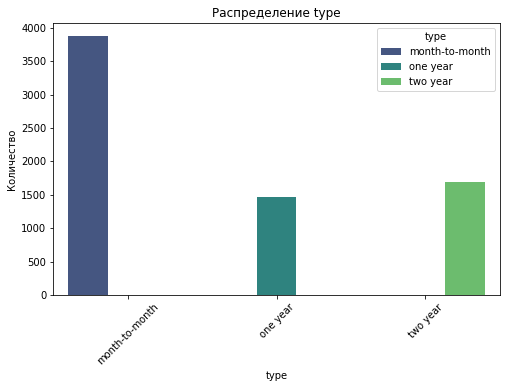

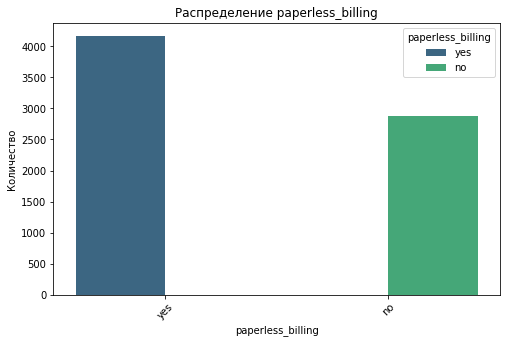

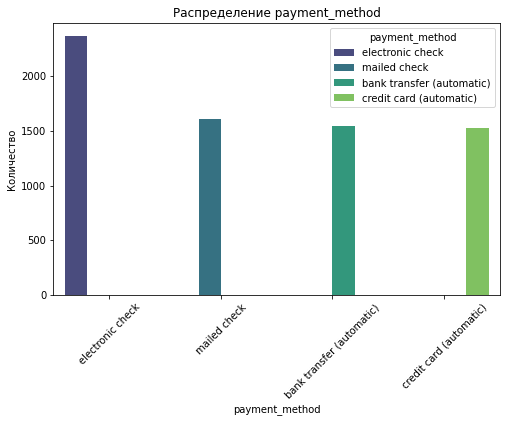

In [66]:
plot_categorical_distribution(contract, cat_contract)

- Наиболее представлен тип оплаты month-to-month (ежемесячно)
- Наиболее представлен электронный расчётный лист со значением yes
- Наиболее представлен тип платежа - electronic check, остальные примерно одинаково
___

In [67]:
col_contract = ['monthly_charges', 'total_charges']

In [68]:
def plot_numerical_distribution(data, numerical_features):
    for feature in numerical_features:
        if data[feature].dtype in ['int64', 'float64']:  
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            
            # Гистограмма
            sns.histplot(data[feature], kde=True, ax=axes[0], color='skyblue')
            axes[0].set_title(f'Гистограмма для {feature}')
            axes[0].set_xlabel(feature)
            axes[0].set_ylabel('Частота')
            
            # Ящик с усами
            sns.boxplot(x=data[feature], ax=axes[1], color='lightgreen')
            axes[1].set_title(f'Ящик с усами для {feature}')
            axes[1].set_xlabel(feature)
            
            plt.tight_layout()
            plt.show()
        else:
            print(f"Признак {feature} не является числовым и не может быть отображен.")

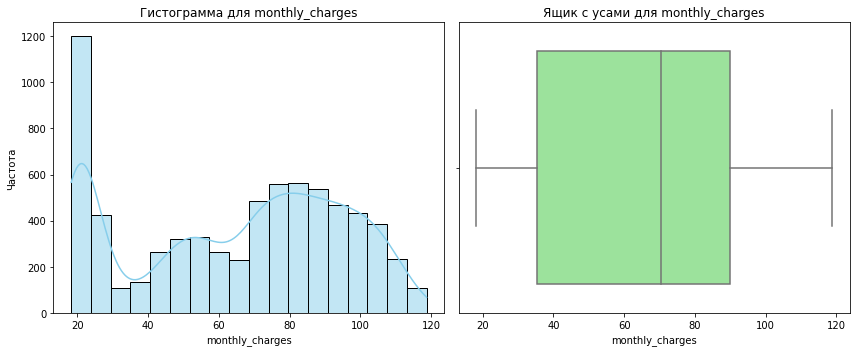

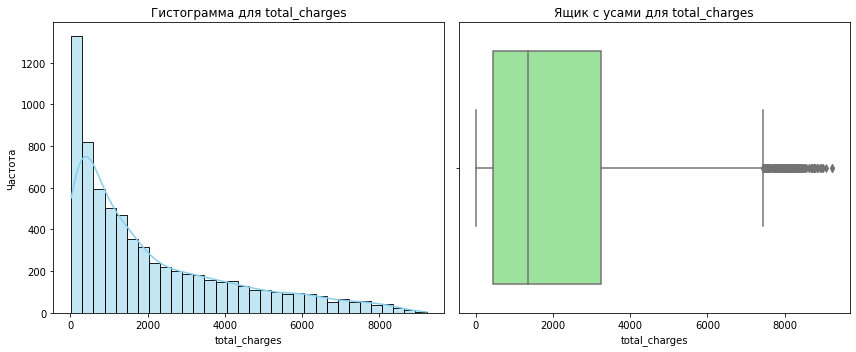

In [69]:
plot_numerical_distribution(contract, col_contract)

- Гистрограмма monthly_charges представлена ввиде 3 выраженных вершин, это может указывать на разные пакеты услуг, которыми пользуются клиенты. На ящике с усами выбросов нет
- Гистрограмма total_charges сильно смещено влево к нулю, это может говорить нам о большом количестве новых клиентов. На ящике с усами есть выбросы

<a id='step3.2'></a>

### Исследовательский анализ данных personal_new

In [70]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-vhveg,female,no,yes,no
1,5575-gnvde,male,no,no,no
2,3668-qpybk,male,no,no,no
3,7795-cfocw,male,no,no,no
4,9237-hqitu,female,no,no,no


In [71]:
cat_personal = ['gender','senior_citizen','partner','dependents']

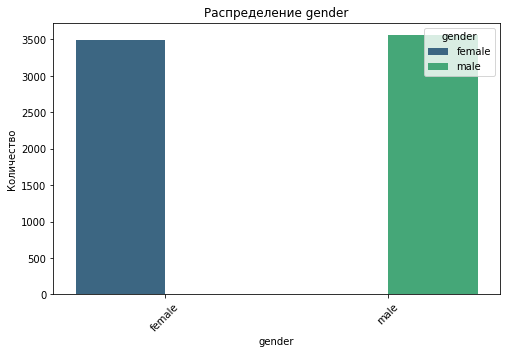

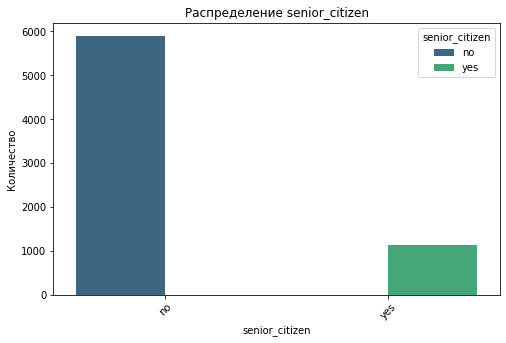

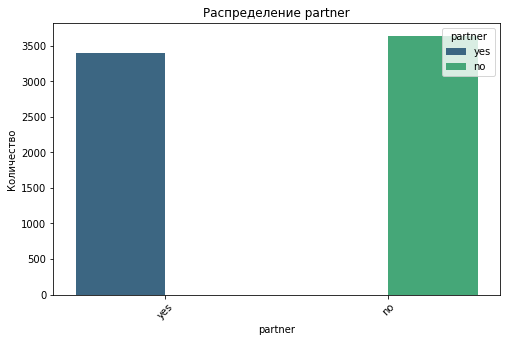

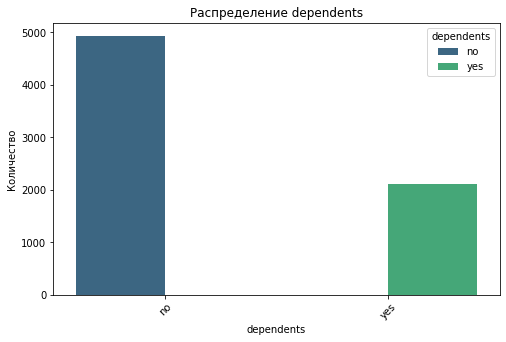

In [72]:
plot_categorical_distribution(personal, cat_personal)

- Пол представлен одинаков
- Подавляющее большинство абонентов не являются пенсионерами
- Распреденеие  "есть ли у абонента супруг или супруга" примерно одинаковое
- У большинства абонентов нет детей\
________



<a id='step3.3'></a>

### Исследовательский анализ данных internet_new

In [73]:
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-vhveg,dsl,no,yes,no,no,no,no
1,5575-gnvde,dsl,yes,no,yes,no,no,no
2,3668-qpybk,dsl,yes,yes,no,no,no,no
3,7795-cfocw,dsl,yes,no,yes,yes,no,no
4,9237-hqitu,fiber optic,no,no,no,no,no,no


In [74]:
cat_internet = ['internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']

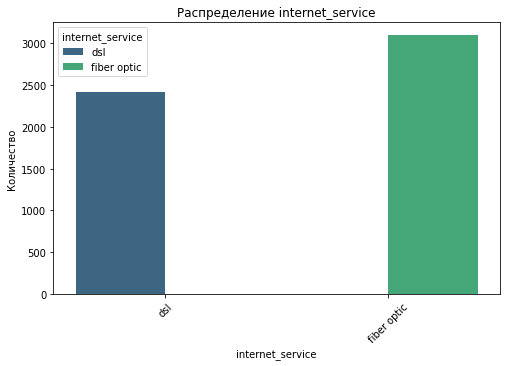

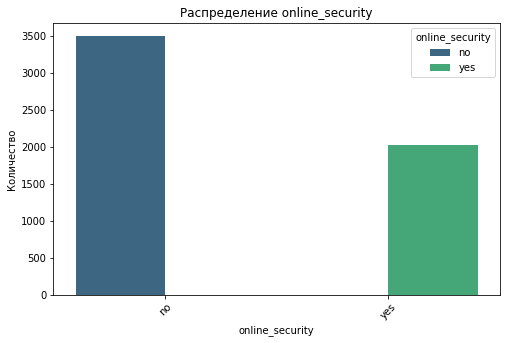

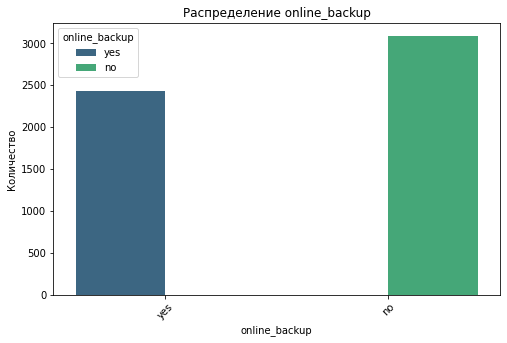

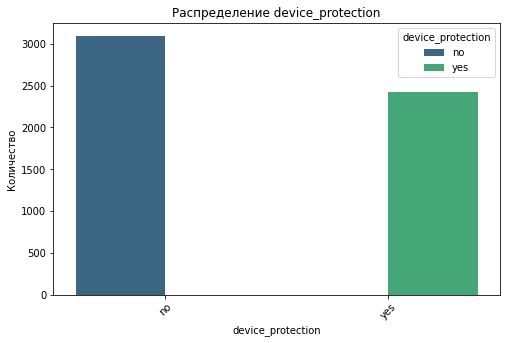

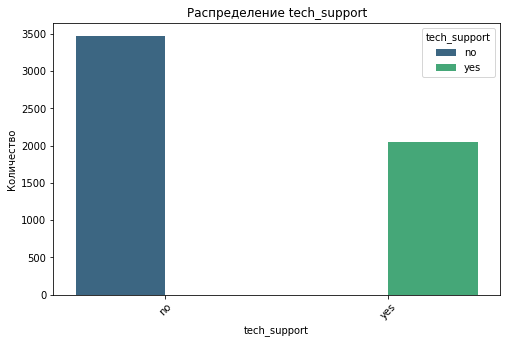

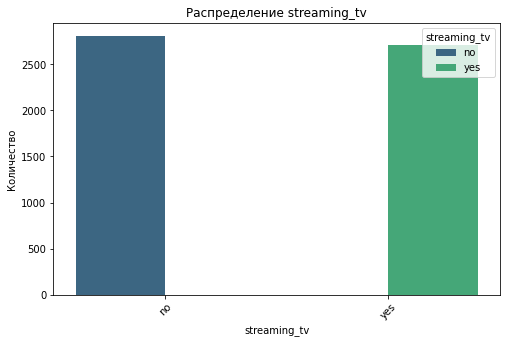

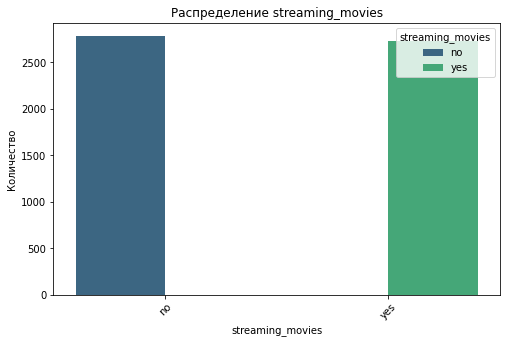

In [75]:
plot_categorical_distribution(internet, cat_internet)

- Большинство абонентов подключенка через fiber optic
- У большинства абонентов нет блокировки опасных сайтов
- У большинства абонентов нет облачного хранилища файлов для резервного копирования данных
- У большинства абонентов нет антивируса
- У большинства абонентов нет выделенной линии технической поддержки
-  Распределение по стриминговому телевидению примерно одинаковое
- Распределение по каталогу фильмов примерно одинаковое
____

<a id='step3.4'></a>

### Исследовательский анализ данных phone_new

In [76]:
phone.head()

,customer_id,multiple_lines
0,5575-gnvde,no
1,3668-qpybk,no
2,9237-hqitu,no
3,9305-cdskc,yes
4,1452-kiovk,yes


In [77]:
cat_phone = ['multiple_lines']

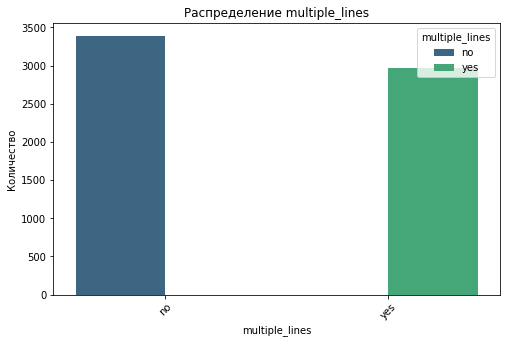

In [78]:
plot_categorical_distribution(phone, cat_phone)

У большинства абонентов нет подключения телефона к нескольким линиям одновременно

<a id='step4'></a>

## Объединение данных

In [79]:
contract.shape

(7043, 8)

In [80]:
personal.shape

(7043, 5)

In [81]:
internet.shape

(5517, 8)

In [82]:
phone.shape

(6361, 2)

In [83]:
data = pd.merge(contract, personal, on='customer_id', how='left')
data = pd.merge(data, internet, on='customer_id', how='left')
data = pd.merge(data, phone, on='customer_id', how='left')

In [84]:
data.shape

(7043, 20)

In [85]:
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,31.04,female,no,yes,no,dsl,no,yes,no,no,no,no,NaN
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,2071.84,male,no,no,no,dsl,yes,no,yes,no,no,no,no
2,3668-qpybk,2019-10-01,no,month-to-month,yes,mailed check,53.85,226.17,male,no,no,no,dsl,yes,yes,no,no,no,no,no
3,7795-cfocw,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1960.60,male,no,no,no,dsl,yes,no,yes,yes,no,no,NaN
4,9237-hqitu,2019-09-01,no,month-to-month,yes,electronic check,70.70,353.50,female,no,no,no,fiber optic,no,no,no,no,no,no,no


In [86]:
# Проверка уникальности клиентов по идентификатору
if data['customer_id'].is_unique:
    print("Все строки соответствуют уникальным клиентам.")
else:
    print("Есть дубликаты клиентов.")

Все строки соответствуют уникальным клиентам.


In [87]:
# Поиск дубликатов по идентификатору клиента
duplicates = data[data.duplicated(subset=['customer_id'], keep=False)]
if duplicates.empty:
    print("Дубликатов клиентов нет.")
else:
    print("Найдены дубликаты клиентов:")
    print(duplicates)

Дубликатов клиентов нет.


In [88]:
# Проверка на пропущенные значения в столбце customer_id
if data['customer_id'].isnull().any():
    print("Есть пропущенные значения в customer_id.")
else:
    print("Пропущенных значений в customer_id нет.")

Пропущенных значений в customer_id нет.


Объединили данные в единый датафрейм по customer_id
_____

<a id='step5'></a>

## Исследовательский анализ и предобработка данных объединённого датафрейма

<a id='step5.1'></a>

### Предобработка данных объединённого датафрейма

In [89]:
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,31.04,female,no,yes,no,dsl,no,yes,no,no,no,no,NaN
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,2071.84,male,no,no,no,dsl,yes,no,yes,no,no,no,no
2,3668-qpybk,2019-10-01,no,month-to-month,yes,mailed check,53.85,226.17,male,no,no,no,dsl,yes,yes,no,no,no,no,no
3,7795-cfocw,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1960.60,male,no,no,no,dsl,yes,no,yes,yes,no,no,NaN
4,9237-hqitu,2019-09-01,no,month-to-month,yes,electronic check,70.70,353.50,female,no,no,no,fiber optic,no,no,no,no,no,no,no


In [90]:
data.isnull().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

In [91]:
data[data['internet_service'].isna()].head(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
11,7469-lkbci,2018-10-01,no,two year,no,credit card (automatic),18.95,312.30,male,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
16,8191-xwszg,2015-10-01,no,one year,no,mailed check,20.65,1106.01,female,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
21,1680-vdcww,2019-02-01,no,one year,no,bank transfer (automatic),19.80,237.60,male,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
22,1066-jksgk,2019-11-01,no,month-to-month,no,mailed check,20.15,61.05,male,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
33,7310-egvhz,2020-01-01,no,month-to-month,no,bank transfer (automatic),20.20,22.22,male,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [92]:
data[data['multiple_lines'].isna()].head(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,31.04,female,no,yes,no,dsl,no,yes,no,no,no,no,NaN
3,7795-cfocw,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1960.60,male,no,no,no,dsl,yes,no,yes,yes,no,no,NaN
7,6713-okomc,2019-04-01,no,month-to-month,no,mailed check,29.75,300.48,female,no,no,no,dsl,yes,no,no,no,no,no,NaN
20,8779-qrdmv,2019-11-01,no,month-to-month,yes,electronic check,39.65,118.95,male,yes,no,no,dsl,no,no,yes,no,no,yes,NaN
27,8665-utdhz,2019-11-01,no,month-to-month,no,electronic check,30.20,96.04,male,no,yes,yes,dsl,no,yes,no,no,no,no,NaN


In [93]:
columns_to_fill = [
    'internet_service', 'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'
]

In [94]:
# Заменим пропуски заглушкой unknown
data[columns_to_fill] = data[columns_to_fill].fillna('unknown')

In [95]:
data[data['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
488,4472-lvygi,2020-02-01,no,two year,yes,bank transfer (automatic),52.55,NaN,female,no,yes,yes,dsl,yes,no,yes,yes,yes,no,unknown
753,3115-czmzd,2020-02-01,no,two year,no,mailed check,20.25,NaN,male,no,no,yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,no
936,5709-lvoeq,2020-02-01,no,two year,no,mailed check,80.85,NaN,female,no,yes,yes,dsl,yes,yes,yes,no,yes,yes,no
1082,4367-nuyao,2020-02-01,no,two year,no,mailed check,25.75,NaN,male,no,yes,yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,yes
1340,1371-dwpaz,2020-02-01,no,two year,no,credit card (automatic),56.05,NaN,female,no,yes,yes,dsl,yes,yes,yes,yes,yes,no,unknown
3331,7644-omvmy,2020-02-01,no,two year,no,mailed check,19.85,NaN,male,no,yes,yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,no
3826,3213-vvolg,2020-02-01,no,two year,no,mailed check,25.35,NaN,male,no,yes,yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,yes
4380,2520-sgtta,2020-02-01,no,two year,no,mailed check,20.00,NaN,female,no,yes,yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,no
5218,2923-arzlg,2020-02-01,no,one year,yes,mailed check,19.70,NaN,male,no,yes,yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,no
6670,4075-wkniu,2020-02-01,no,two year,no,mailed check,73.35,NaN,female,no,yes,yes,dsl,no,yes,yes,yes,yes,no,yes


In [97]:
# так как это новые абоненты (их договор вступил в силу с 2020-02-01), то у них еще нет истории платежей, то заполним значение 0
data['total_charges'] = data['total_charges'].fillna(0)

In [98]:
data.isnull().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

Заменили пропущенные значения заглушкой unknown, в total_charges заполнили 0, тк это новые абоненты и у них еще нет истории платежей
_____

<a id='step5.2'></a>

### Добавление новых признаков и исследовательский анализ объединённого датафрейма

In [99]:
# Разделим датафрейма на абонентов, которые ушли, и которые остались

In [100]:
# Замена 'no' на '2020-02-01'
data.loc[data['end_date'] == 'no', 'end_date'] = '2020-02-01'

In [101]:
data['end_date'] = pd.to_datetime(data['end_date'], errors='coerce')

In [102]:
# Добавление признака период пользования услугами
data['period'] = (data['end_date'] - data['begin_date']).dt.days

In [103]:
loss_date = pd.to_datetime('2020-02-01')

In [104]:
# Добавление целевого признака 0 - аобнент остался, 1 - абонент ушел
data['client_loss'] = (data['end_date'] < loss_date).astype(int)

In [105]:
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,period,client_loss
0,7590-vhveg,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,31.04,female,no,...,dsl,no,yes,no,no,no,no,unknown,31,0
1,5575-gnvde,2017-04-01,2020-02-01,one year,no,mailed check,56.95,2071.84,male,no,...,dsl,yes,no,yes,no,no,no,no,1036,0
2,3668-qpybk,2019-10-01,2020-02-01,month-to-month,yes,mailed check,53.85,226.17,male,no,...,dsl,yes,yes,no,no,no,no,no,123,0
3,7795-cfocw,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1960.60,male,no,...,dsl,yes,no,yes,yes,no,no,unknown,1371,0
4,9237-hqitu,2019-09-01,2020-02-01,month-to-month,yes,electronic check,70.70,353.50,female,no,...,fiber optic,no,no,no,no,no,no,no,153,0


In [106]:
current = data[data['end_date'] == '2020-02-01']

In [107]:
current.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,period,client_loss
0,7590-vhveg,2020-01-01,2020-02-01,month-to-month,yes,electronic check,29.85,31.04,female,no,...,dsl,no,yes,no,no,no,no,unknown,31,0
1,5575-gnvde,2017-04-01,2020-02-01,one year,no,mailed check,56.95,2071.84,male,no,...,dsl,yes,no,yes,no,no,no,no,1036,0
2,3668-qpybk,2019-10-01,2020-02-01,month-to-month,yes,mailed check,53.85,226.17,male,no,...,dsl,yes,yes,no,no,no,no,no,123,0
3,7795-cfocw,2016-05-01,2020-02-01,one year,no,bank transfer (automatic),42.30,1960.60,male,no,...,dsl,yes,no,yes,yes,no,no,unknown,1371,0
4,9237-hqitu,2019-09-01,2020-02-01,month-to-month,yes,electronic check,70.70,353.50,female,no,...,fiber optic,no,no,no,no,no,no,no,153,0


In [108]:
gone = data[data['end_date'] != '2020-02-01']

In [109]:
gone.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,period,client_loss
9,6388-tabgu,2014-12-01,2017-05-01,one year,no,bank transfer (automatic),56.15,1628.35,male,no,...,dsl,yes,yes,no,no,no,no,no,882,1
15,3655-snqyz,2014-05-01,2016-03-01,two year,no,credit card (automatic),113.25,2491.50,female,no,...,fiber optic,yes,yes,yes,yes,yes,yes,yes,670,1
25,6865-jznko,2017-08-01,2018-09-01,month-to-month,yes,bank transfer (automatic),55.30,726.09,female,no,...,dsl,yes,yes,no,no,no,no,no,396,1
30,3841-nfecx,2014-03-01,2018-11-01,two year,yes,credit card (automatic),96.35,5395.60,female,yes,...,fiber optic,yes,yes,yes,yes,no,no,yes,1706,1
35,6234-raapl,2014-02-01,2018-12-01,two year,no,bank transfer (automatic),99.90,5794.20,female,no,...,fiber optic,yes,yes,no,yes,yes,no,yes,1764,1


In [110]:
cat = ['type','paperless_billing','payment_method','gender',
 'senior_citizen','partner','dependents','internet_service',
 'online_security','online_backup','device_protection','tech_support',
 'streaming_tv','streaming_movies','multiple_lines']

In [112]:
col = ['monthly_charges','total_charges']

In [122]:
data_drop = data.drop(['customer_id','begin_date', 'end_date'], axis=1)

In [123]:
phik_overview_data = data_drop.phik_matrix(interval_cols=col)

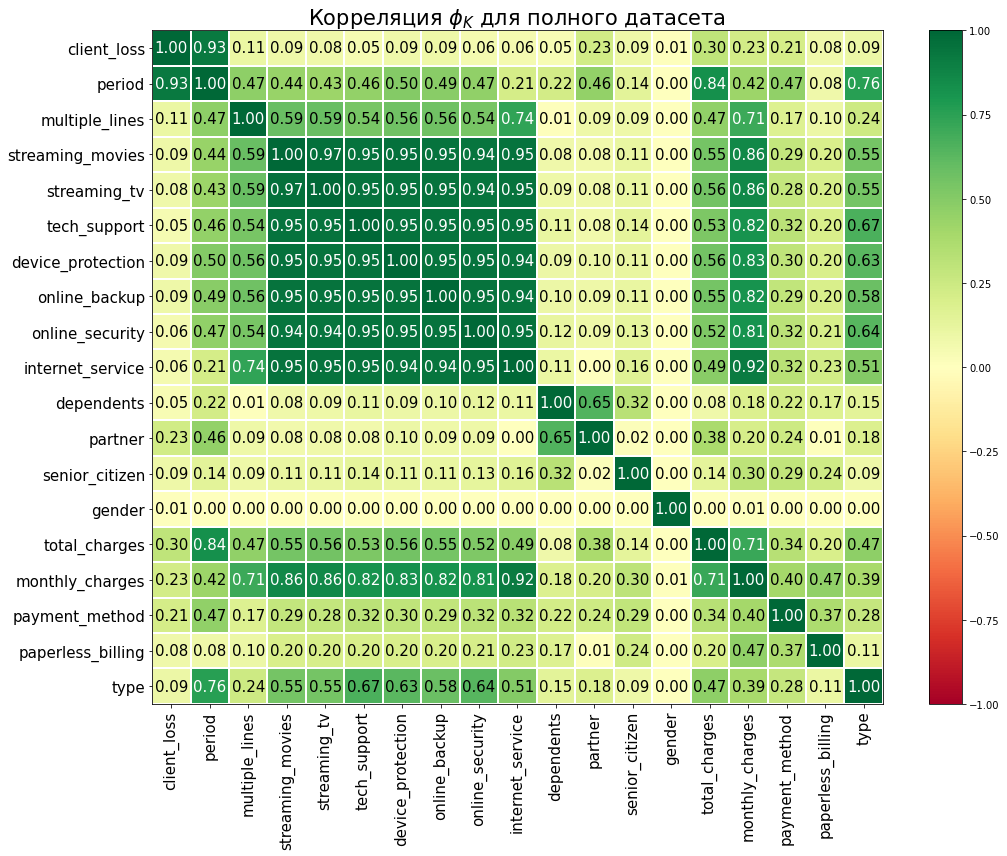

In [124]:
plot_correlation_matrix(
    phik_overview_data.values,
    x_labels=phik_overview_data.columns,
    y_labels=phik_overview_data.index,
    title=r"Корреляция $\phi_K$ для полного датасета",
    fontsize_factor=1.5,
    figsize=(15, 12)
)

Много признаков коррелируют между собой, в основном это признаки относящиеся к Интернету, так же сильно коррелируют признаки связанные с платежами. Целевой признак сильно коррелирует с добавленным признаком (период)
_________

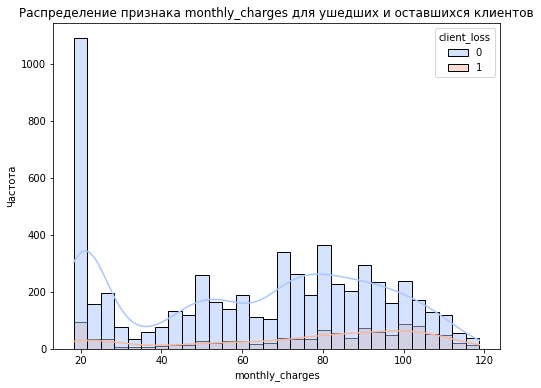

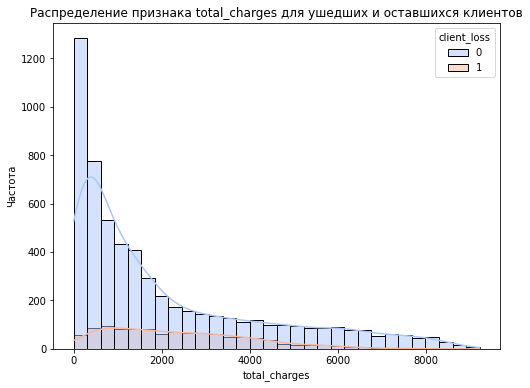

In [125]:
# Визуализация распределения числовых признаков
for feature in col:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, hue='client_loss', kde=True, palette='coolwarm', bins=30)
    plt.title(f'Распределение признака {feature} для ушедших и оставшихся клиентов')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

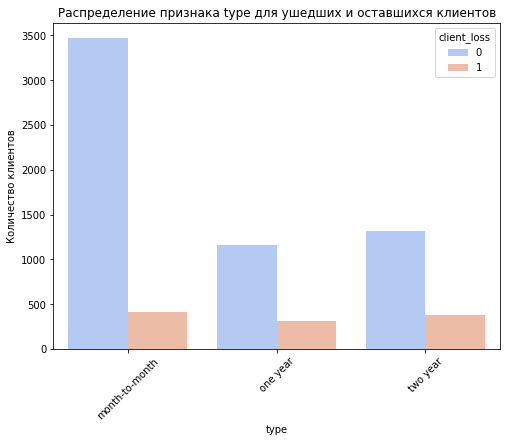

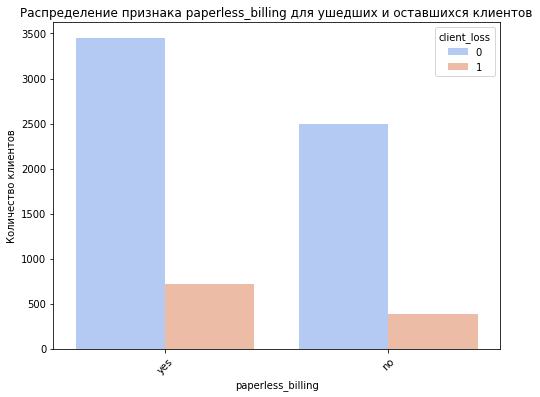

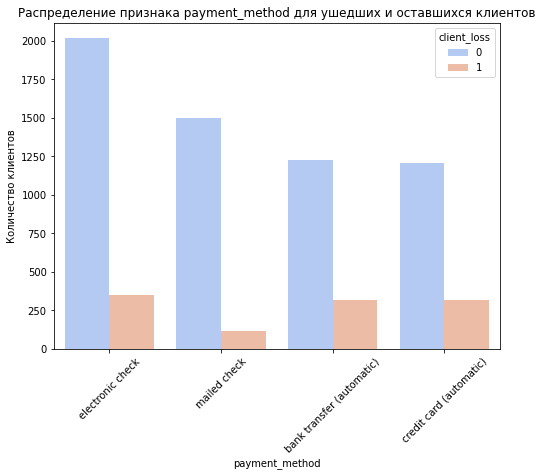

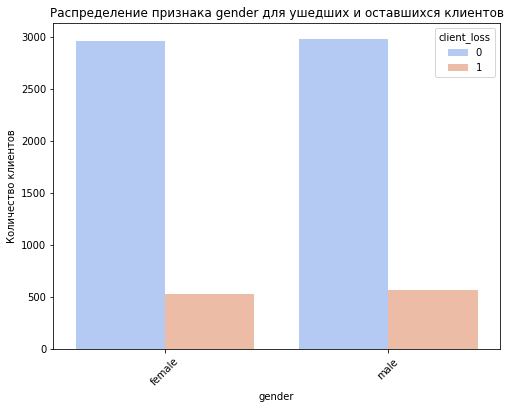

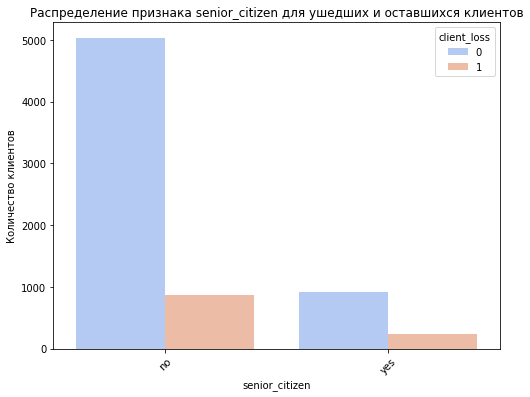

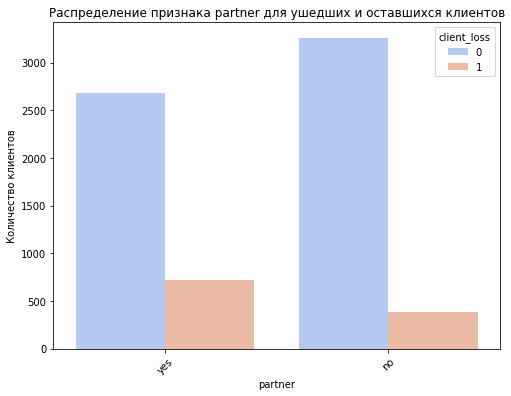

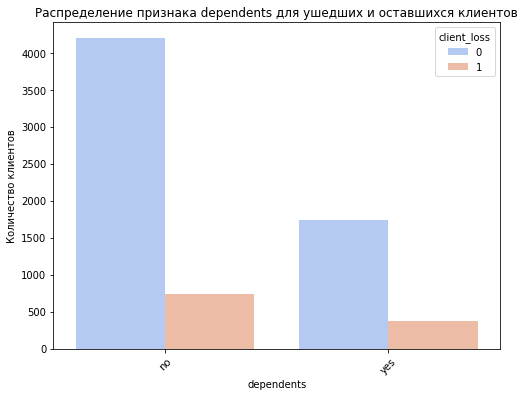

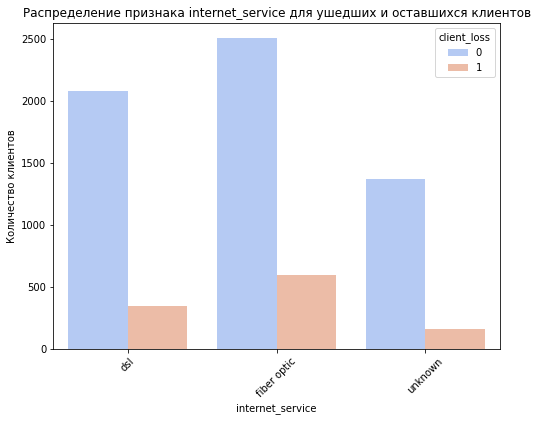

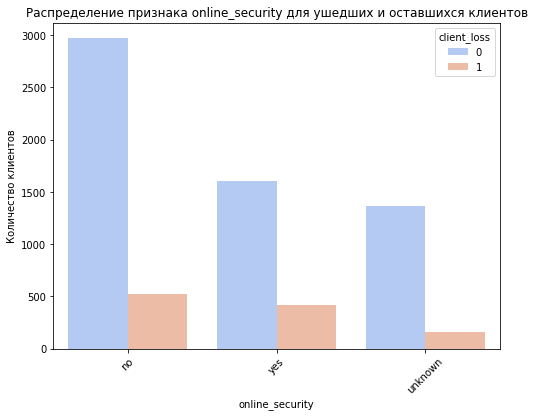

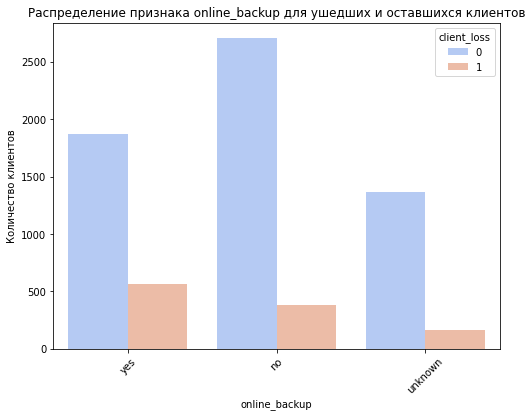

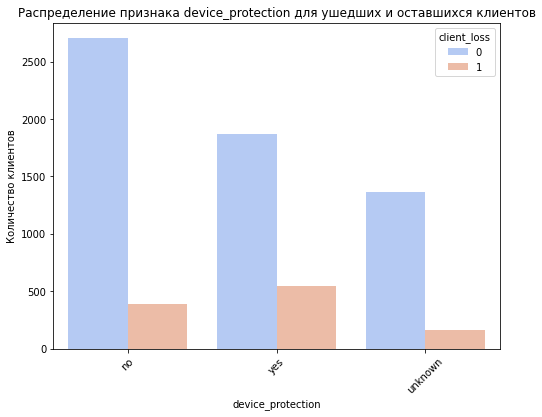

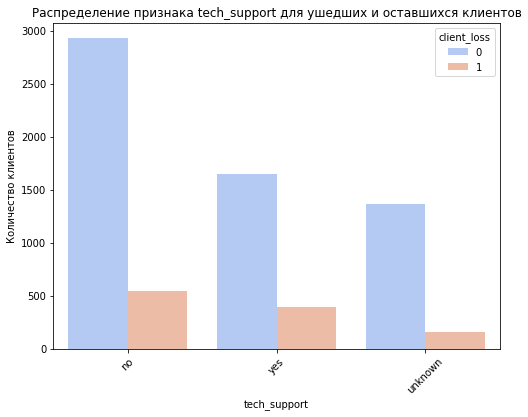

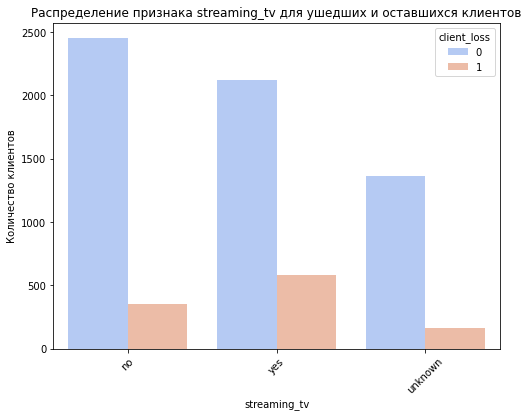

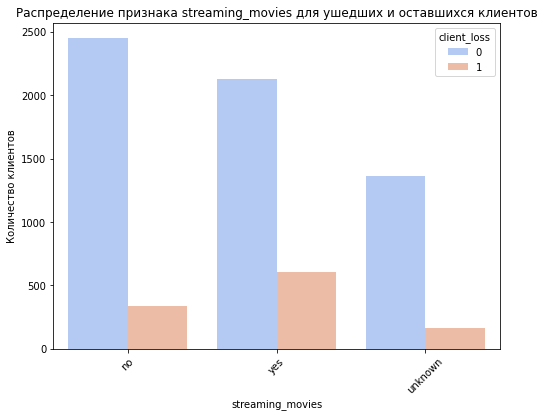

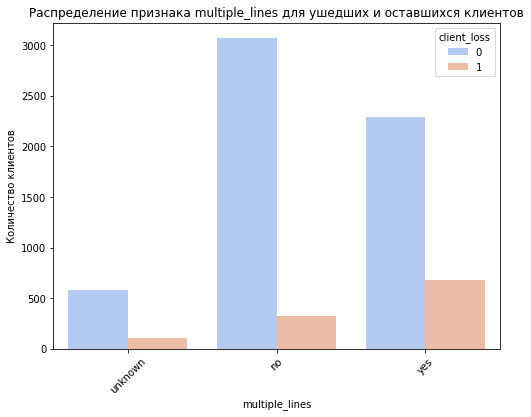

In [126]:
# Визуализация распределения категориальных  признаков
for feature in cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, hue='client_loss', palette='coolwarm')
    plt.title(f'Распределение признака {feature} для ушедших и оставшихся клиентов')
    plt.xlabel(feature)
    plt.ylabel('Количество клиентов')
    plt.xticks(rotation=45)
    plt.show()

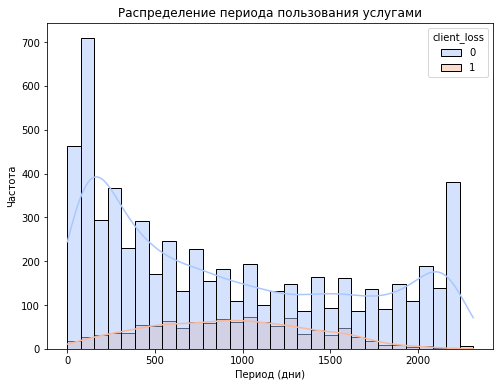

In [127]:
# Визуализация распределения нового признака 'period'
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='period', hue='client_loss', kde=True, palette='coolwarm', bins=30)
plt.title('Распределение периода пользования услугами')
plt.xlabel('Период (дни)')
plt.ylabel('Частота')
plt.show()

Многие признаки в датасете демонстрируют высокую корреляцию между собой. Наибольшая взаимосвязь наблюдается между признаками, связанными с использованием интернет-услуг, а также между признаками, описывающими платежи клиентов. Кроме того, целевой признак (client_loss) имеет сильную корреляцию с добавленным признаком period (период пользования услугами). Для анализа корреляций была построена матрица фи-коэффициентов (φₖ), которая наглядно демонстрирует взаимосвязи между всеми признаками.

<a id='step5.3'></a>

Добавили целевой признак(0 - аобнент остался, 1 - абонент ушел) и новый признак (период пользования услугами)
____

<a id='step6'></a>

## Подготовка данных

In [134]:
data = data.drop(['customer_id','begin_date', 'end_date'], axis=1)

In [135]:
data.drop_duplicates(inplace=True)

In [136]:
X = data.drop(columns=['client_loss'])

In [137]:
y = data['client_loss']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [139]:
numerical_features = ['monthly_charges', 'total_charges', 'period']
categorical_features = ['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 
                        'partner', 'dependents', 'internet_service', 'online_security', 
                        'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 
                        'streaming_movies', 'multiple_lines']

<a id='step7'></a>

## Обучение моделей машинного обучения

In [141]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [142]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [143]:
# Пайплайн для логистической регрессии
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Пайплайн для LGBMClassifier
lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # ваш препроцессор
    ('classifier', lgb.LGBMClassifier())
])

In [144]:
# Гиперпараметры для логистической регрессии
log_reg_param_dist = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1'],
    'classifier__max_iter': [1000, 2000]  
}

# Гиперпараметры для LightGBM
lgb_param_dist = {
    'classifier__n_estimators': [100, 200, 500, 1000],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [-1, 10, 20, 30],
    'classifier__num_leaves': [31, 50, 100],
    'classifier__min_data_in_leaf': [20, 40, 60],
    'classifier__boosting_type': ['gbdt', 'dart']
}

In [145]:
log_reg_search = RandomizedSearchCV(log_reg_pipeline, log_reg_param_dist, 
                                     n_iter=10, cv=5, verbose=1, scoring ='roc_auc',
                                     random_state=RANDOM_STATE, n_jobs=-1, 
                                     return_train_score=True)

In [146]:
lgb_search = RandomizedSearchCV(lgb_pipeline, lgb_param_dist, 
                                 n_iter=10, cv=5, verbose=1, scoring='roc_auc',
                                 random_state=RANDOM_STATE, n_jobs=-1, 
                                 return_train_score=True)

In [147]:
log_reg_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['monthly_charges',
                                                                                'total_charges',
                                                                                'period']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['type',
                                                                                'paperless_billing',
                                                                                'payment_method',
                                                                                'gender',
                                                                                'senior_citizen',
                                                                                'partne...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'classifier__max_iter': [1000, 2000],
                                        'classifier__penalty': ['l1'],
                                        'classifier__solver': ['liblinear',
                                                               'saga']},
                   random_state=270125, return_train_score=True,
                   scoring='roc_auc', verbose=1)

In [148]:
lgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['monthly_charges',
                                                                                'total_charges',
                                                                                'period']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['type',
                                                                                'paperless_billing',
                                                                                'payment_method',
                                                                                'gender',
                                                                                'senior_citizen',
                                                                                'partne...
                   n_jobs=-1,
                   param_distributions={'classifier__boosting_type': ['gbdt',
                                                                      'dart'],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': [-1, 10, 20,
                                                                  30],
                                        'classifier__min_data_in_leaf': [20, 40,
                                                                         60],
                                        'classifier__n_estimators': [100, 200,
                                                                     500,
                                                                     1000],
                                        'classifier__num_leaves': [31, 50,
                                                                   100]},
                   random_state=270125, return_train_score=True,
                   scoring='roc_auc', verbose=1)

In [149]:
log_reg_best_model = log_reg_search.best_estimator_

In [150]:
lgb_best_model = lgb_search.best_estimator_

In [151]:
print("Лучшие гиперпараметры для логистической регрессии:", log_reg_search.best_params_)

Лучшие гиперпараметры для логистической регрессии: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__max_iter': 1000, 'classifier__C': 4.281332398719396}


In [152]:
print(f'Метрика лучшей модели логистической регрессии на кросс-валидации {log_reg_search.best_score_:.2f}')

Метрика лучшей модели логистической регрессии на кросс-валидации 0.77


In [153]:
print("Лучшие гиперпараметры для LightGBM:", lgb_search.best_params_)

Лучшие гиперпараметры для LightGBM: {'classifier__num_leaves': 31, 'classifier__n_estimators': 500, 'classifier__min_data_in_leaf': 40, 'classifier__max_depth': 30, 'classifier__learning_rate': 0.05, 'classifier__boosting_type': 'gbdt'}


In [154]:
print(f'Метрика лучшей модели LightGBM на кросс-валидации {lgb_search.best_score_:.2f}')

Метрика лучшей модели LightGBM на кросс-валидации 0.86


Лучшей моделью на кросс-валидации оказалась LightGBM с метрикой равной 0.88. Её и будем использовать для предсказаний на тестовой выборке

<a id='step8'></a>

## Оценка модели на тестовой выборке

In [155]:
print("Метрика ROC-AUC для модели LightGBM на тестовой выборке:", f"{roc_auc_score(y_test, lgb_best_model.predict_proba(X_test)[:, 1]):.2f}")

Метрика ROC-AUC для модели LightGBM на тестовой выборке: 0.88


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


По условиям задачи метрика на тестовой выборке должна быть больше 0.85. Получилось - 0.88, условия выполнены

In [156]:
if isinstance(lgb_best_model.named_steps['classifier'], lgb.LGBMClassifier):
    # Получение важности признаков
    feature_importances = lgb_best_model.named_steps['classifier'].feature_importances_
    
    # Получение имен признаков после предобработки
    feature_names = lgb_best_model.named_steps['preprocessor'].get_feature_names_out()
    
    # Создание DataFrame с важностью признаков
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    
    # Сортировка по важности
    importance_df = importance_df.sort_values(by='importance', ascending=False)
    
    # Вывод важности признаков
    print("Важность признаков для LGBMClassifier:")
    print(importance_df)

Важность признаков для LGBMClassifier:
                                          feature  importance
2                                     num__period        5493
0                            num__monthly_charges        2954
1                              num__total_charges        2380
16                                cat__partner_no         256
12                             cat__gender_female         242
3                        cat__type_month-to-month         215
10           cat__payment_method_electronic check         197
18                             cat__dependents_no         183
41                         cat__multiple_lines_no         179
6                       cat__paperless_billing_no         178
9     cat__payment_method_credit card (automatic)         158
29                      cat__device_protection_no         148
5                              cat__type_two year         147
8   cat__payment_method_bank transfer (automatic)         147
23                        cat__

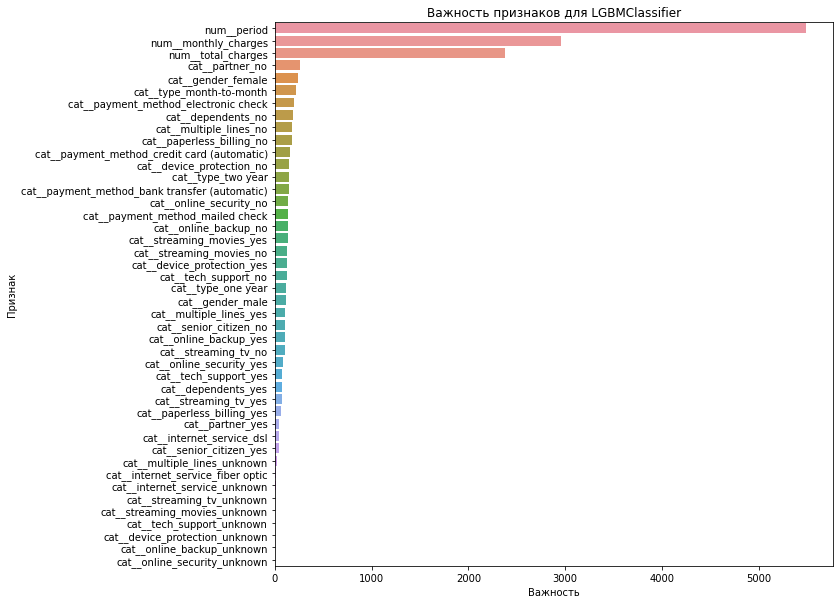

In [157]:
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Важность признаков для LGBMClassifier')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

Наиболее важными оказались количественные признаки

<a id='step9'></a>

## Выводы

На этапе загрузки данных было установлено, что все файлы содержат необходимую информацию без значительных пропусков, но требуют предобработки. Исследовательский анализ показал, что мы обладаем набором характеристик, которые потенциально могут влиять на уход абонентов.

После предобработки данных и их визуализации выяснили, что существует корреляция между некоторыми признаками, такими как тип подключения и способ оплаты. На этапе подготовки данных мы использовали подходы к кодированию категориальных переменных и масштабированию численных данных. Объединение данных по идентификатору абонента позволило создать единую таблицу, содержащую всю информацию о абонентах.

Тестирование моделей, таких как логистическая регрессия и LightGBM, дало направление в выборе подходящих алгоритмов. Лучшая модель показала высокую точность и способность предсказывать отток клиентов с использованием протестированных метрик, таких как ROC AUC.

В качестве рекомендаций для бизнеса мы можем предложить внедрить персонализированные предложения для абонентов с высоким риском ухода и использовать данные модели для проактивных коммуникаций с абонентами, предлагая им выгодные условия. Это может включать в себя предоставление специальных тарифов или акций на дополнительные услуги.

Основные выводы и рекомендации
Модели продемонстрировали высокую точность предсказания ухода абонентов, что позволяет оператору связи «ТелеДом» заранее идентифицировать абонентов, находящихся под риском ухода.
Рекомендовано развивать программы лояльности и предложить абонентам специальные условия, чтобы уменьшить вероятность их ухода.
Периодически проводить анализ и обновлять модель для достижения лучших результатов в предсказании ухода на основе новых данных.
Учитывая всё вышесказанное, проект продемонстрировал большие перспективы для оператора «ТелеДом» в борьбе с уходом абонентов.